In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'All the Intermediate Colleges in Pakistan.csv'
data = pd.read_csv(file_path)


In [3]:
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
                                                Name  \
0                                   Campus.pk Lahore   
1        Allama Iqbal Open University Aiou Islamabad   
2           Government College University Gcu Lahore   
3             Govt College University GCU Faisalabad   
4  Lahore College For Women University (Lcwu) Lahore   

                                            Location  \
0  Office 206, 2nd Floor Siddique Trade Center Ma...   
1                        Sector H-8, Islamabad-44000   
2          GC University, Katchery Road Lahore 54000   
3                       Kotwali Rd, Faisalabad 38000   
4                Near Wapda Flats, Jail Road, Lahore   

                                       Study Program   Sector Affiliation  \
0                FSc Pre Engineering Fsc Pre Medical  Private         ads   
1  FSc Pre Engineering ICs Computer Science FSc P...   Public         NaN   
2  FSc Pre Engineering ICS Computer Science FSc P...   Public   

In [4]:
#basic information about the dataset
print("\nBasic information about the dataset:")
print(data.info())


Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           1630 non-null   object
 1   Location       1626 non-null   object
 2   Study Program  1630 non-null   object
 3   Sector         1101 non-null   object
 4   Affiliation    155 non-null    object
 5   Rating         1630 non-null   object
dtypes: object(6)
memory usage: 76.5+ KB
None


In [5]:
# summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(data.describe())


Summary statistics of the dataset:
                    Name Location  \
count               1630     1626   
unique              1630     1573   
top     Campus.pk Lahore  Chakwal   
freq                   1       11   

                                            Study Program   Sector  \
count                                                1630     1101   
unique                                                774        2   
top     FA ICS Computer Science FSc Pre Medical FSc Pr...  Private   
freq                                                   49      562   

                   Affiliation Rating  
count                      155   1630  
unique                      97     21  
top     University of Sargodha     0*  
freq                         7   1119  


In [6]:
# Checking for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
Name                0
Location            4
Study Program       0
Sector            529
Affiliation      1475
Rating              0
dtype: int64


In [7]:
# Handle missing values 
data_clean = data.dropna()

In [8]:
# the shape of the cleaned dataset
print("\nShape of the cleaned dataset:")
print(data_clean.shape)


Shape of the cleaned dataset:
(75, 6)


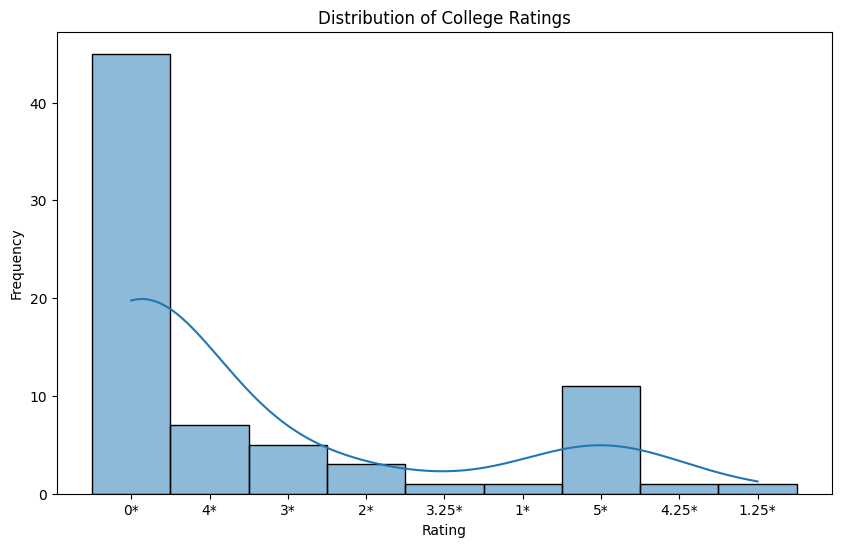

In [9]:
# Analysis of 'Rating' distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_clean['Rating'], bins=20, kde=True)
plt.title('Distribution of College Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

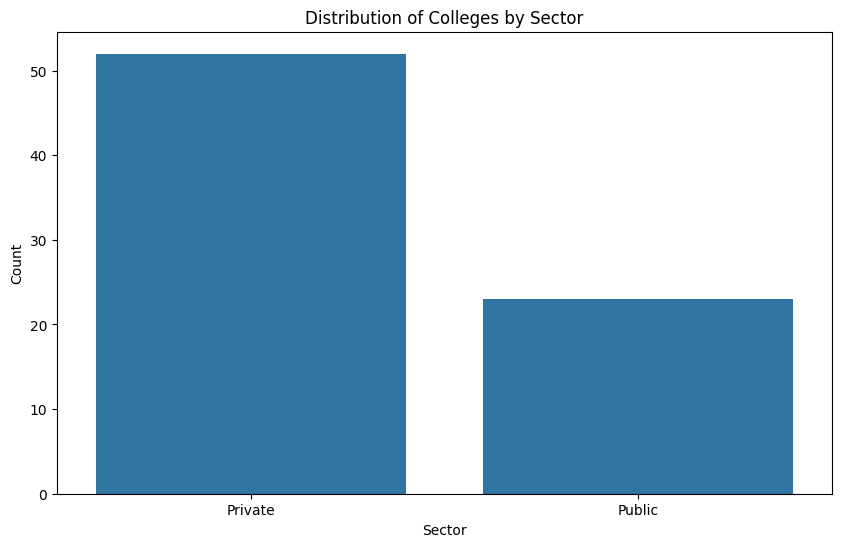

In [10]:
# Analysis of 'Sector' distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Sector', data=data_clean)
plt.title('Distribution of Colleges by Sector')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.show()

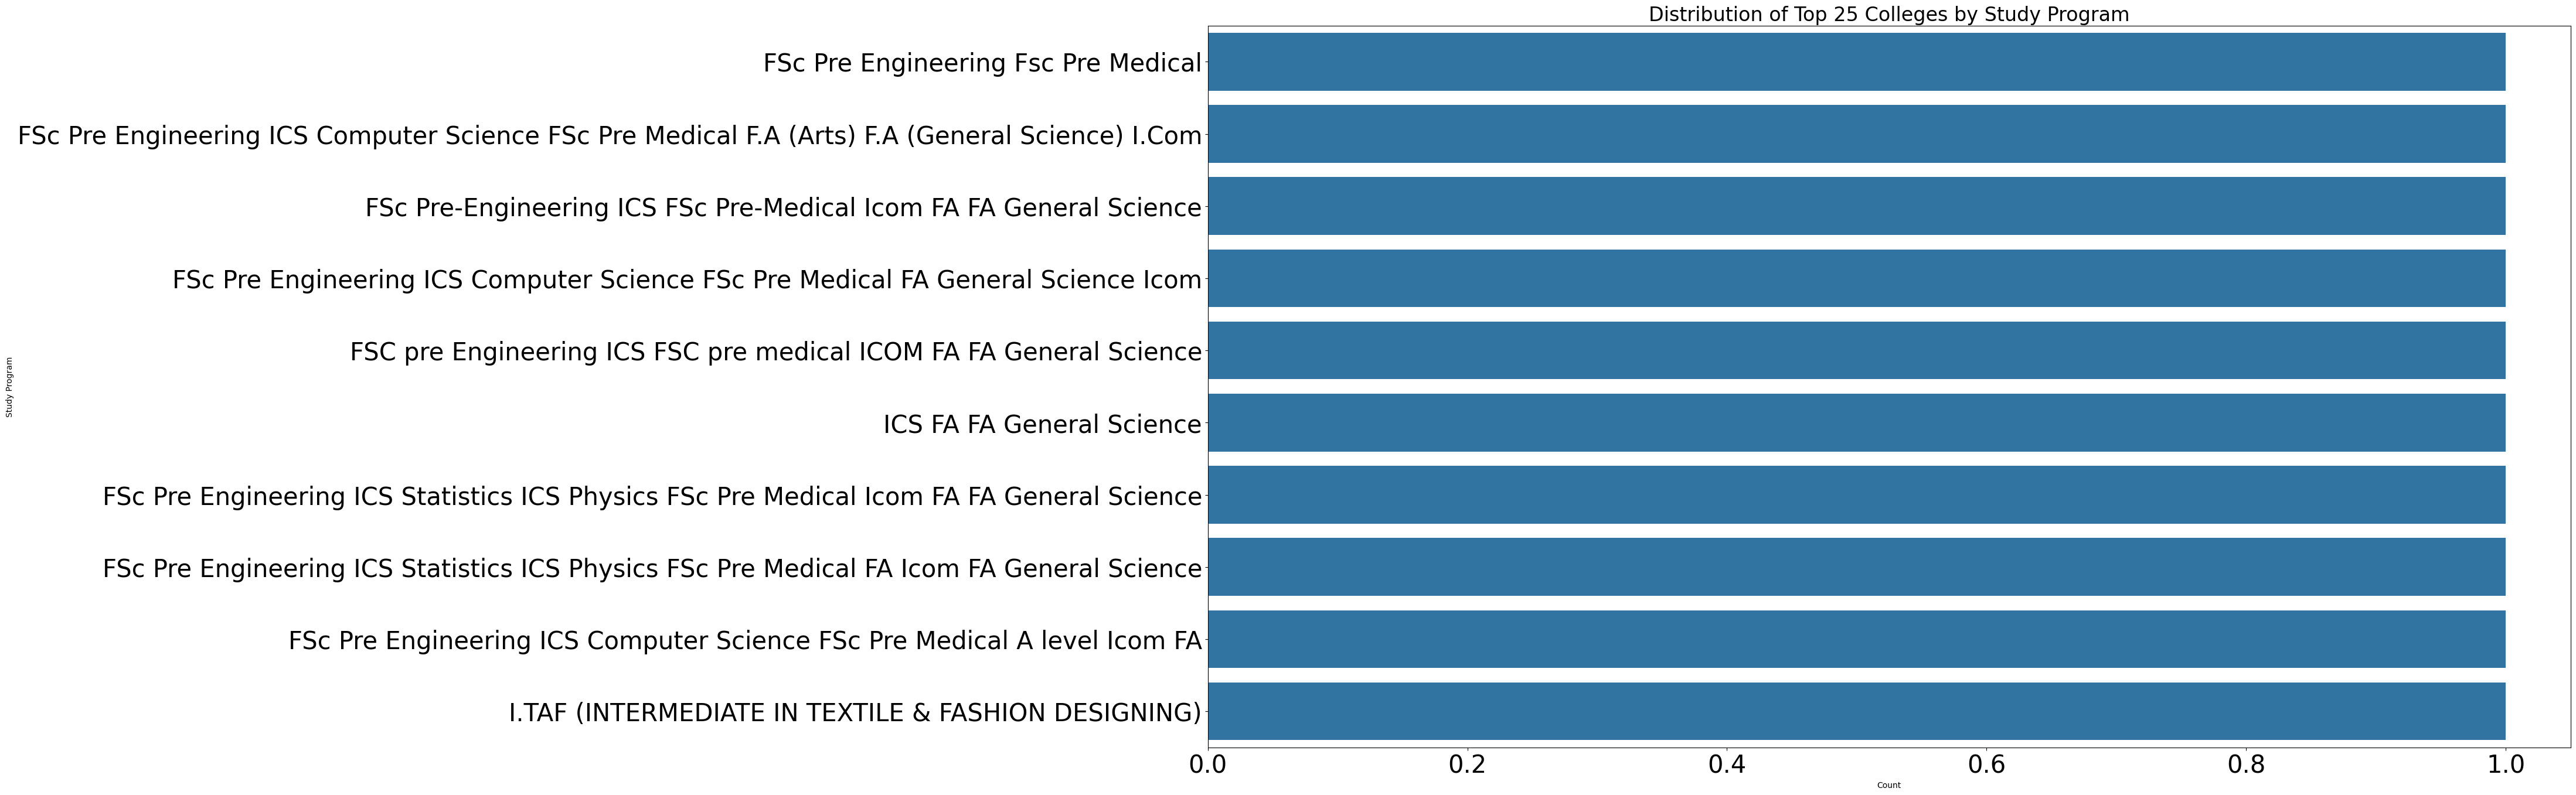

In [11]:
# Analysis of 'Study Program' distribution
plt.figure(figsize=(30, 16))
sns.countplot(y='Study Program', data=data_clean, order=data_clean['Study Program'].head(10))
plt.title('Distribution of Top 25 Colleges by Study Program', fontsize=24)
plt.xlabel('Count')
plt.yticks(fontsize=30)
plt.xticks(fontsize=30)
plt.ylabel('Study Program')
plt.show()

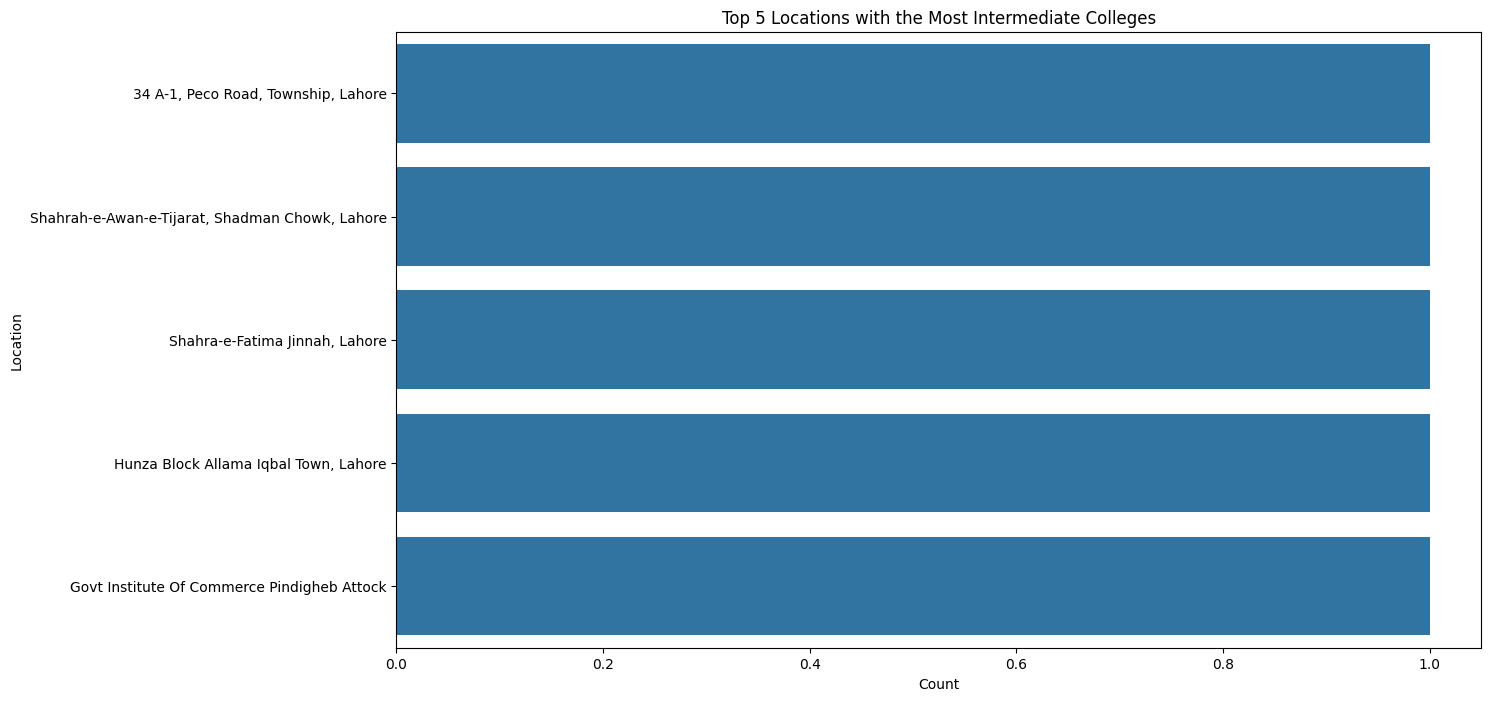

In [12]:
# Analysis of 'Location' distribution
plt.figure(figsize=(14, 8))
top_locations = data_clean['Location'].value_counts().tail(5)
sns.barplot(x=top_locations.values, y=top_locations.index)
plt.title('Top 5 Locations with the Most Intermediate Colleges')
plt.xlabel('Count')
plt.ylabel('Location')
plt.show()

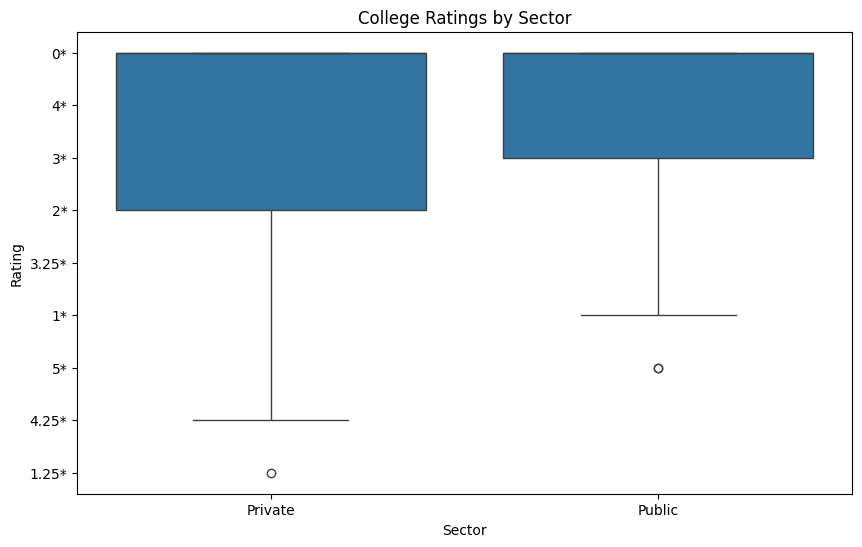

In [13]:
# Relationship between 'Rating' and 'Sector'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sector', y='Rating', data=data_clean)
plt.title('College Ratings by Sector')
plt.xlabel('Sector')
plt.ylabel('Rating')
plt.show()

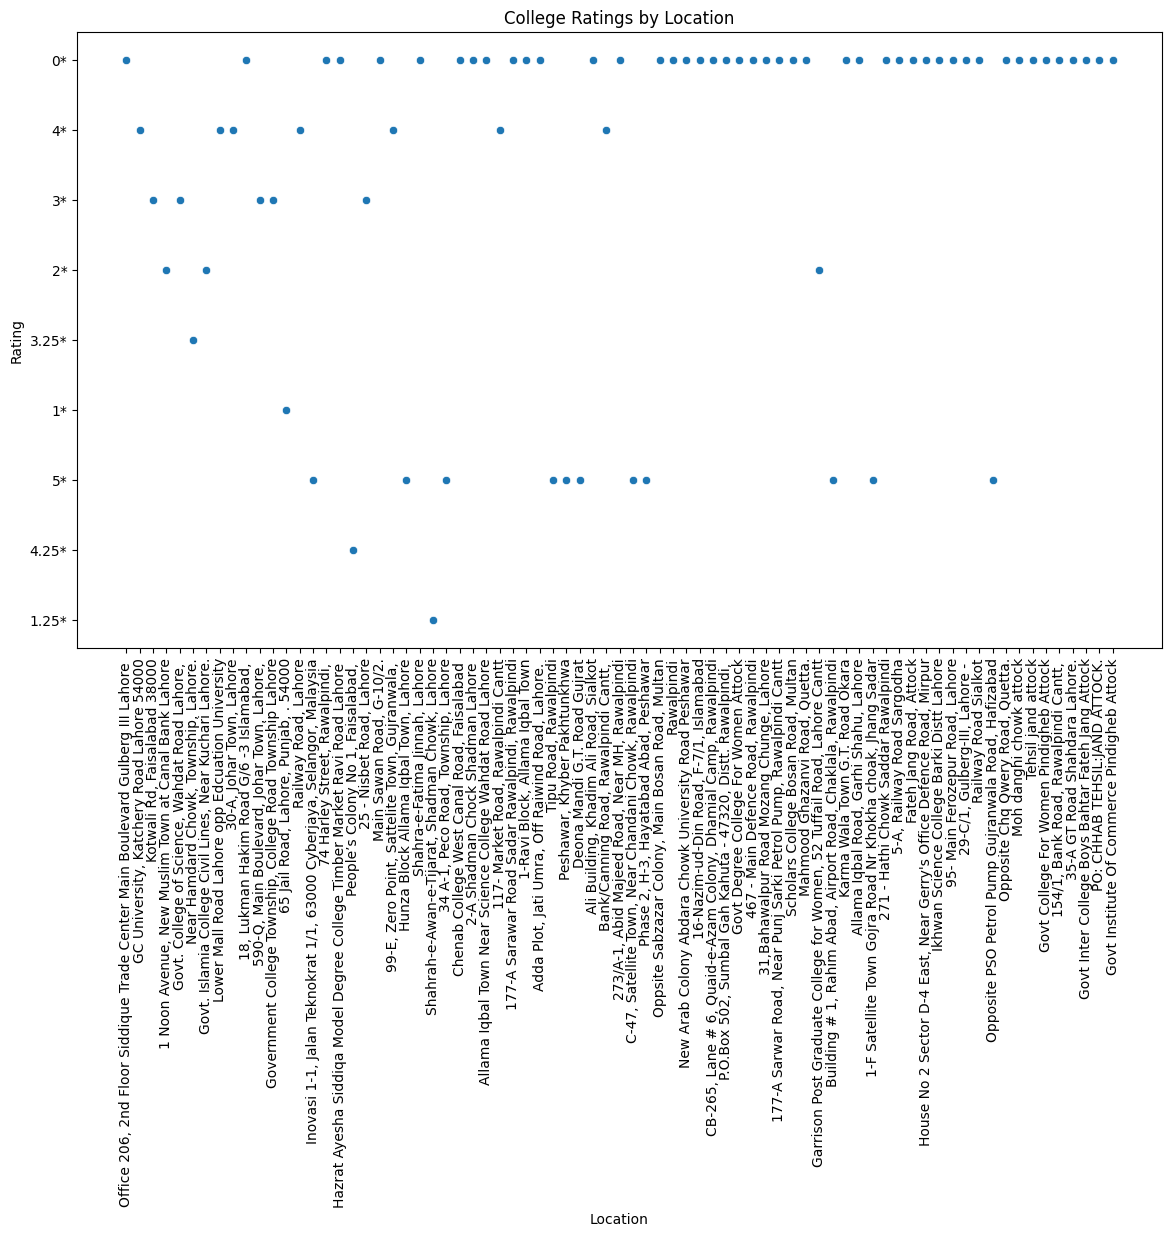

In [14]:
# Relationship between 'Rating' and 'Location' (Scatter Plot)
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Location', y='Rating', data=data_clean)
plt.title('College Ratings by Location')
plt.xlabel('Location')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

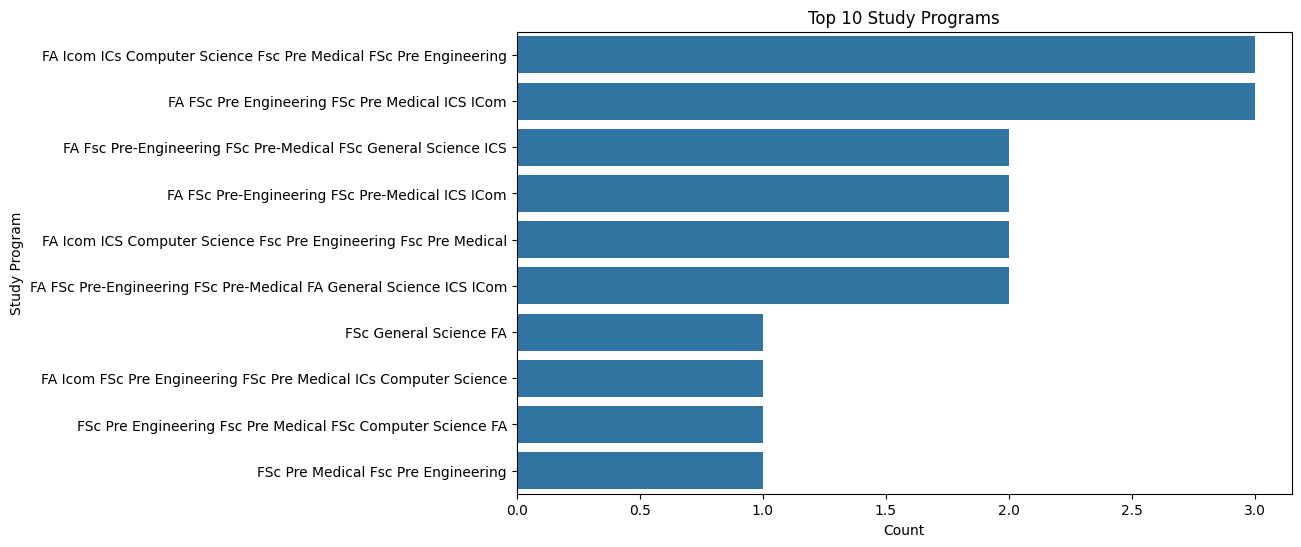

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Study Program', data=data_clean, order=data_clean['Study Program'].value_counts().head(10).index)
plt.title('Top 10 Study Programs')
plt.xlabel('Count')
plt.ylabel('Study Program')
plt.show()

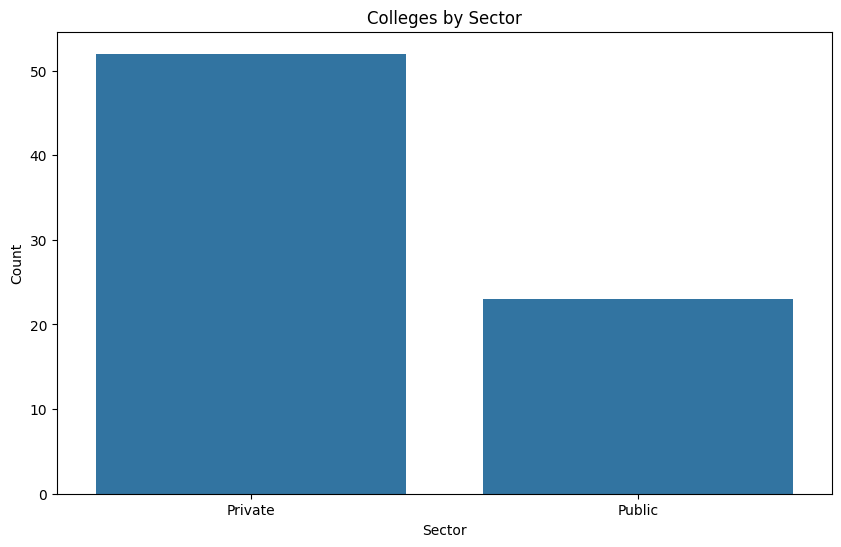

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sector', data=data_clean)
plt.title('Colleges by Sector')
plt.xlabel('Sector')
plt.ylabel('Count')
plt.show()

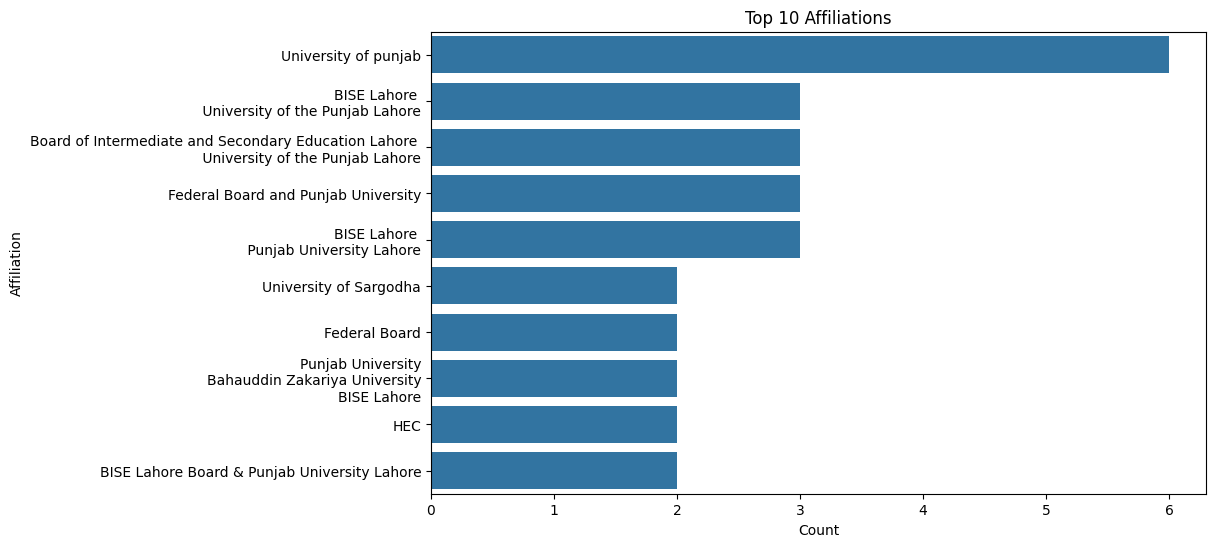

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Affiliation', data=data_clean, order=data_clean['Affiliation'].value_counts().head(10).index)
plt.title('Top 10 Affiliations')
plt.xlabel('Count')
plt.ylabel('Affiliation')
plt.show()

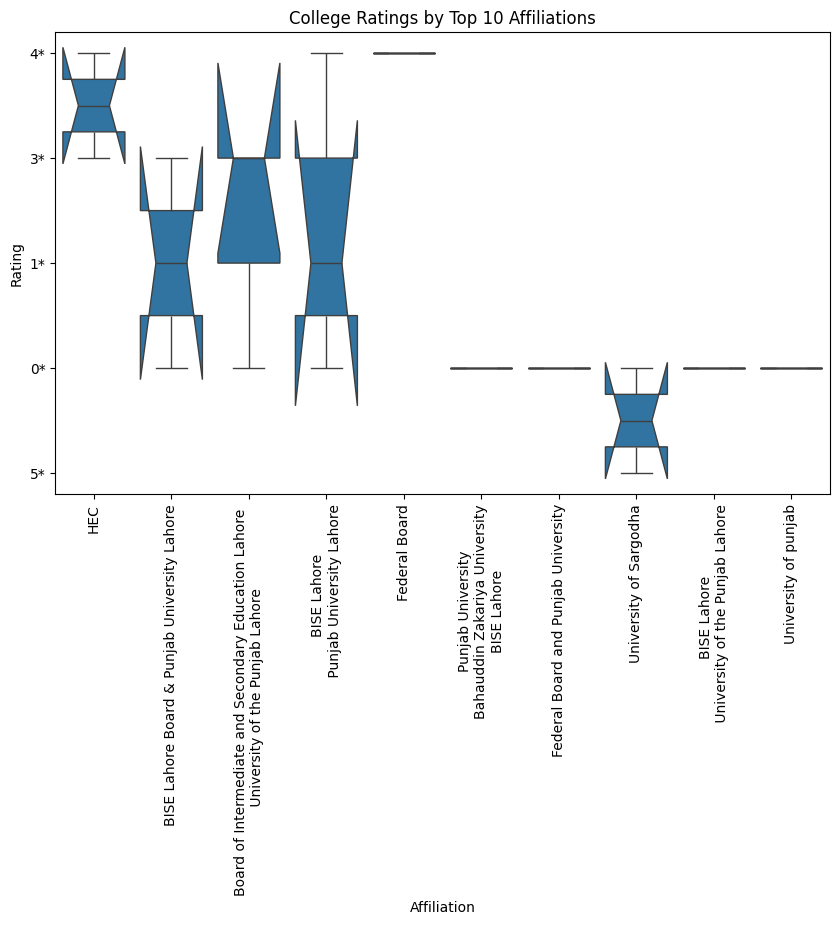

In [18]:
# Get the top 10 affiliations by the number of entries
top_affiliations = data_clean['Affiliation'].value_counts().nlargest(10).index

# Filter the data to include only the top 10 affiliations
top_data_clean = data_clean[data_clean['Affiliation'].isin(top_affiliations)]




# Plot the boxplot for the top 10 affiliations
plt.figure(figsize=(10, 6))
sns.boxplot(x='Affiliation', y='Rating', data=top_data_clean, notch=True)
plt.title('College Ratings by Top 10 Affiliations')
plt.xlabel('Affiliation')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

In [19]:
import plotly.express as px
# Interactive visualizations with Plotly
fig = px.scatter(data_clean, x='Location', y='Rating', title='Interactive Scatter Plot of Ratings by Location')
fig.show()